In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn; seaborn.set()
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize




In [2]:
# Reading all csv files in the directory
import os
directory = "/Users/amad/Desktop/data 1/Audio"

for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(os.path.join(root, subdirectory))
    for file in files:
        print(os.path.join(root, file))

/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton
/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio
/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver
/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa
/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki
/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header
/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah
/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray
/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated
/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi
/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger
/Users/amad/Desktop/data 1/Audio/Jake Keels - Jake Keels - Jake_Keels
/Users/amad/Desktop/data 1/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI

In [3]:
# Reading stop data csv files from a folder
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 1/Audio"
EXT = "*stop.csv"
stop = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
stop

['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/stop.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/stop.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/stop.csv',
 '/User

In [4]:
# Reading go csv files
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 1/Audio"
EXT = "*go.csv"
go = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
go

['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/go.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/go.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/go.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/go.csv',
 '/Users/amad/Desktop/data 1/

In [5]:
# Reading up csv files
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 1/Audio"
EXT = "*up.csv"
up = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
up

['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/up.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/up.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/up.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/up.csv',
 '/Users/amad/Desktop/data 1/

In [6]:
# Reading down csv files 
import os
from glob import glob
PATH = "/Users/amad/Desktop/data 1/Audio"
EXT = "*down.csv"
down = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
down

['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/down.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/down.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/down.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/down.csv',
 '/User

In [7]:
# Creating a List for down csv files
down_files = ['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/down.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/down.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/down.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Jake Keels - Jake Keels - Jake_Keels/down.csv',
 '/Users/amad/Desktop/data 1/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Anvesh - Anvesh_Avirneni/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Pratik Devkota - Pratik_Devkota/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Thomas Knepshield - Thomas_Knepshield/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Eric Yan - 2022-03-08 21.09.43 - Eric_Yan/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/down.csv',
 '/Users/amad/Desktop/data 1/Audio/Zoie Harris - Zoie_Harris_REVISED/down.csv']


In [8]:
# Creating List for up csv files
up_files = ['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/up.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/up.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/up.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Jake Keels - Jake Keels - Jake_Keels/up.csv',
 '/Users/amad/Desktop/data 1/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Pratik Devkota - Pratik_Devkota/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Thomas Knepshield - Thomas_Knepshield/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Eric Yan - 2022-03-08 21.09.43 - Eric_Yan/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/up.csv',
 '/Users/amad/Desktop/data 1/Audio/Zoie Harris - Zoie_Harris_REVISED/up.csv']


In [9]:
# Creating a List for stop csv files
stop_files = ['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/stop.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/stop.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Jake Keels - Jake Keels - Jake_Keels/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Anvesh - Anvesh_Avirneni/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Pratik Devkota - Pratik_Devkota/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Thomas Knepshield - Thomas_Knepshield/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Eric Yan - 2022-03-08 21.09.43 - Eric_Yan/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/stop.csv',
 '/Users/amad/Desktop/data 1/Audio/Zoie Harris - Zoie_Harris_REVISED/stop.csv']

In [10]:
# Creating a list for go csv files
go_files = ['/Users/amad/Desktop/data 1/Audio/McKenzie Staton - 2022-03-01 21.06.35 - McKenzie_Staton/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Sai Venkatesh Atukuri - SaiVenkatesh_audio/go.csv',
 "/Users/amad/Desktop/data 1/Audio/Aka'sh Carver - Aka'sh_Carver/go.csv",
 '/Users/amad/Desktop/data 1/Audio/Anthony Mesa - Anthony_Mesa/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Nathan Tolodziecki - Nathan Tolodziecki - Nathan_Tolodziecki/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Sardar Karan Singh - KaranSingh_SardarTask2_updated_header/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Syed Amad H Shah - 2022-02-26 05.00.19 - Syed_Shah/go.csv',
 '/Users/amad/Desktop/data 1/Audio/michael mungaray - Michael_Mungaray/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Tom Truong - Thomas_Truong_Updated/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Connor Contursi - Connor Contursi/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Teegan Krieger - 2022-03-01 21.05.42 - Teegan_Krieger/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Jake Keels - Jake Keels - Jake_Keels/go.csv',
 '/Users/amad/Desktop/data 1/Audio/TEJASAI_CHUNDRU - 2022-03-08 02.33.34 - TEJASAI_CHUNDRU1/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Carlos Ruiz - Carlos Ruiz - Carlos_Ruiz/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Atreya Avadhanula - 2022-03-01 21.16.23 - atreya_avadhanula/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Anvesh - Anvesh_Avirneni/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Pratik Devkota - Pratik_Devkota/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Thomas Knepshield - Thomas_Knepshield/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Eric Yan - 2022-03-08 21.09.43 - Eric_Yan/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Praneeth Aluru - 2022-03-01 21.12.20 - Praneeth_Aluru_Task_2/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Steven Tagner - 2022-03-01 21.07.27 - steven_tagner/go.csv',
 '/Users/amad/Desktop/data 1/Audio/Zoie Harris - Zoie_Harris_REVISED/go.csv']


In [11]:
# Concatinating all stop csv files and saving them to one csv file
stopData = pd.concat((pd.read_csv(i) for i in stop_files)) # Import
stopData.to_csv('/Users/amad/Desktop/495/stop2_combined.csv', index = False)

In [12]:
# Concatinating all go csv files and saving them to one csv file
goData = pd.concat((pd.read_csv(i) for i in go_files)) # Import
goData.to_csv('/Users/amad/Desktop/495/go2_combined.csv', index = False)

In [13]:
# Concatinating all uo csv files and saving them to one csv file
upData = pd.concat((pd.read_csv(i) for i in up_files)) # Import
upData.to_csv('/Users/amad/Desktop/495/up2_combined.csv', index = False)

In [14]:
# Concatinating all down csv files and saving into one csv file
downData = pd.concat((pd.read_csv(i) for i in down_files)) # Import
downData.to_csv('/Users/amad/Desktop/495/down2_combined.csv', index = False)

In [15]:
# Reading previously csv files for all 4 catagories, created in previous step
df1 = pd.read_csv("/Users/amad/Desktop/495/stop2_combined.csv")

df2 = pd.read_csv("/Users/amad/Desktop/495/go2_combined.csv")

df3 = pd.read_csv("/Users/amad/Desktop/495/up2_combined.csv")

df4 = pd.read_csv("/Users/amad/Desktop/495/down2_combined.csv")

# Assigning Lebels (stop = 0, go = 1, up = 2, down = 3)

In [16]:
df1["label"] = "0"
df1.to_csv("stop_data.csv", index = False)
df2["label"] = "1"
df2.to_csv("go_data.csv", index = False)
df3["label"] = "2"
df3.to_csv("up.csv", index = False)
df4["label"] = "3"
df4.to_csv("down_data.csv", index = False)

In [17]:
# Merging all 4 data frames into one frame
frames = [df1, df2, df3, df4]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv("/Users/amad/Desktop/495/combined2_audio.csv", index = False)

In [18]:
# reading audio csv file created in previous step
audio = pd.read_csv("/Users/amad/Desktop/combined2_audio.csv")

In [19]:
# Filling empth strings with 0 
audio = audio.apply(pd.to_numeric, errors='coerce')
audio = audio.fillna(0)

In [20]:
# droping label and sample and assigning the rest the data set to X
X = audio.drop(columns=['sample', 'label'])

In [21]:
# Assigning Labels for y
y = audio[['label']]

In [22]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,22.020000,21.400000,18.799999,14.920000,14.020000,12.540000,8.860000,6.260000,6.260000,5.100000,...,3.62,3.620000,3.620000,3.620000,3.62,3.62,3.62,0.000000,0.000000,0.00
1,69.720001,124.879997,110.459999,147.239990,145.199997,152.039993,155.779999,142.520004,121.320000,104.299995,...,11.44,10.219999,10.219999,10.219999,8.86,7.24,7.24,6.260000,5.100000,5.10
2,53.699997,60.139999,61.639999,54.899998,45.059998,42.820000,40.139999,36.200001,34.139999,34.719997,...,5.10,5.100000,7.240000,7.240000,8.86,8.86,8.86,9.559999,8.860000,8.86
3,42.059998,47.739998,51.439999,51.840000,56.199997,57.340000,54.419998,41.099998,26.599998,18.459999,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00
4,64.860001,45.639999,44.919998,47.619999,50.939999,51.320000,43.579998,42.820000,45.340000,38.480000,...,8.08,8.860000,10.219999,8.860000,8.86,8.08,7.24,6.260000,6.260000,6.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,47.879997,46.500000,48.020000,36.919998,15.780000,7.240000,0.000000,9.559999,16.980000,21.100000,...,12.00,11.440000,11.440000,9.559999,8.86,8.08,6.26,5.100000,5.100000,6.26
2171,74.279999,66.459999,49.759998,32.579998,29.400000,38.820000,52.079998,41.739998,28.500000,17.719999,...,0.00,0.000000,0.000000,0.000000,3.62,3.62,3.62,5.100000,3.620000,3.62
2172,124.500000,134.979996,127.119995,106.040001,141.419998,101.820000,35.459999,17.359999,5.100000,0.000000,...,0.00,3.620000,5.100000,3.620000,0.00,0.00,6.26,0.000000,10.219999,7.24
2173,44.919998,44.040001,45.340000,47.739998,46.059998,44.919998,39.820000,36.380001,21.100000,3.620000,...,5.10,5.100000,5.100000,5.100000,3.62,3.62,3.62,3.620000,3.620000,3.62


In [23]:
y

,label
0,3
1,3
2,3
3,2
4,1
...,...
2170,1
2171,0
2172,2
2173,1


In [24]:
# Splitting the dataset into 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1740, 64)
(1740, 1)
(435, 64)
(435, 1)


In [25]:
# Fitting random forest model
clf = RandomForestClassifier(n_estimators=50, random_state=50)
clf.fit(X_train, y_train)

<ipython-input-25-8d09e3029c67>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=50)

In [26]:
# Predicting test dataset

predicted = clf.predict(X_test)
# Probability of prediction
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.5632183908045977

In [27]:
# Classification matrix
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49        98
           1       0.52      0.53      0.53       116
           2       0.64      0.68      0.66       100
           3       0.59      0.55      0.57       121

    accuracy                           0.56       435
   macro avg       0.56      0.56      0.56       435
weighted avg       0.56      0.56      0.56       435



In [28]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[48 12 26 12]
 [20 62  5 29]
 [15 12 68  5]
 [13 34  7 67]]


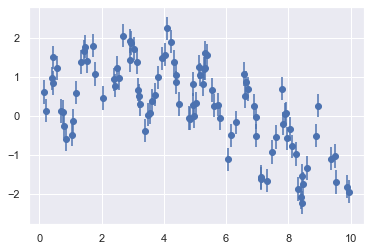

In [29]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


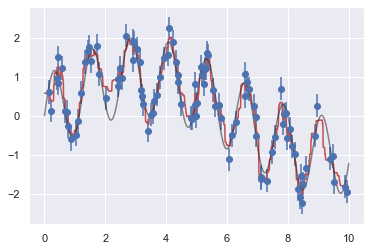

In [30]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [31]:
from micromlgen import port

with open("./models/class_Audio_Classifier.h", "w") as file:
    file.write(port(clf, classname="Classifier"))

In [32]:
!cat ./models/class_Audio_Classifier.h


#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class Classifier {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[4] = { 0 };
                        // tree #1
                        if (x[17] <= 6.75) {
                            if (x[57] <= 13.289999961853027) {
                                if (x[8] <= 1.809999942779541) {
                                    if (x[3] <= 37.08999824523926) {
                                        if (x[61] <= 9.859999656677246) {
                                            if (x[13] <= 1.809999942779541) {
                                                if (x[44] <= 1.809999942779541) {
                                                    if (x[35] <= 1.809999942779541) {
                                                      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
!du -sh ./models/class_Audio_Classifier.h


6.9M	./models/class_Audio_Classifier.h
